# Pandas Data Cleaning - Cumulative Lab

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and exploratory data analysis. In order to complete this lab, you'll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
- Practice opening and inspecting the contents of CSVs using pandas dataframes
- Practice identifying and handling missing values
- Practice identifying and handling invalid values
- Practice cleaning text data by removing whitespace and fixing typos
- Practice joining multiple dataframes

## Your Task: Clean the Superheroes Dataset with Pandas

![LEGO superheroes](images/lego_superheroes.jpg)

Photo by <a href="https://unsplash.com/@yuliamatvienko?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Yulia Matvienko</a> on <a href="/s/photos/superhero?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

### Data Understanding
In this lab, we'll work with a version of the comprehensive Superheroes Dataset, which can be found on [Kaggle](https://www.kaggle.com/claudiodavi/superhero-set/data) and was originally scraped from [SuperHeroDb](https://www.superherodb.com/). We have modified the structure and contents of the dataset somewhat for the purposes of this lab.  Note that this data was collected in June 2017, so it may not reflect the most up-to-date superhero lore.

The data is contained in two separate CSV files:

1. `heroes_information.csv`: each record represents a superhero, with attributes of that superhero (e.g. eye color). Height is measured in centimeters, and weight is measured in pounds.
2. `super_hero_powers.csv`: each record represents a superpower, then has True/False values representing whether each superhero has that power

### Business Understanding

The business questions you have been provided are:

1. What is the distribution of superheroes by publisher?
2. What is the relationship between height and number of superpowers? And does this differ based on gender?
3. What are the 5 most common superpowers in Marvel Comics vs. DC Comics?

This lab also simulates something you are likely to encounter at some point or another in your career in data science: someone has given you access to a dataset, as well as a few questions, and has told you to "find something interesting".

So, in addition to completing the basic data cleaning tasks and the aggregation and reshaping tasks needed to answer the provided questions, you will also need to formulate a question of your own and perform any additional cleaning/aggregation/reshaping that is needed to answer it.

### Requirements

#### 1. Load the Data with Pandas

Create a dataframes `heroes_df` and `powers_df` that represent the two CSV files. Use pandas methods to inspect the shape and other attributes of these dataframes.

#### 2. Perform Data Cleaning Required to Answer First Question

The first question is: *What is the distribution of superheroes by publisher?*

In order to answer this question, you will need to:

* Identify and handle missing values
* Identify and handle text data requiring cleaning

#### 3. Perform Data Aggregation and Cleaning Required to Answer Second Question

The second question is: *What is the relationship between height and number of superpowers? And does this differ based on gender?*

In order to answer this question, you will need to:

* Join the dataframes together
* Identify and handle invalid values

#### 4. Perform Data Aggregation Required to Answer Third Question

The third question is: *What are the 5 most common superpowers in Marvel Comics vs. DC Comics?*

This should not require any additional data cleaning or joining of tables, but it will require some additional aggregation.

#### 5. Formulate and Answer Your Own Question

This part is fairly open-ended. Think of a question that can be answered with the available data, and perform any cleaning or aggregation required to answer that question.

## 1. Load the Data with Pandas

In the cell below, we:

* Import and alias `pandas` as `pd`
* Import and alias `numpy` as `np`
* Import and alias `seaborn` as `sns`
* Import and alias `matplotlib.pyplot` as `plt`
* Set Matplotlib visualizations to display inline in the notebook

In [1]:
# Run this cell without changes

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Superheroes

In the cell below, load `heroes_information.csv` as `heroes_df`:

In [2]:
# Your code here
# Load the CSV file into a pandas DataFrame
heroes_df = pd.read_csv('heroes_information.csv')

# Display the first few rows of the dataframe to check
heroes_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


It looks like that CSV came with an index column, resulting in an extra column called `Unnamed: 0`. We don't need that column, so write code to get rid of it below.

There are two ways to do this:

1. Re-load with `read_csv`, and specify the parameter `index_col=0`
2. Drop the column `Unnamed: 0` with `axis=1`

In [3]:
# Your code here
#Drop the 'unnamed:0' column
heroes_df = heroes_df.drop(columns = ['Unnamed: 0'],axis=1)

heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


The following code checks that the dataframe was loaded correctly.

In [4]:
# Run this cell without changes

# There should be 734 rows
assert heroes_df.shape[0] == 734

# There should be 10 columns. If this fails, make sure you got rid of
# the extra index column
assert heroes_df.shape[1] == 10

# These should be the columns
assert list(heroes_df.columns) == [
    "name",
    "Gender",
    "Eye color",
    "Race",
    "Hair color",
    "Height",
    "Publisher",
    "Skin color",
    "Alignment",
    "Weight",
]

Now you want to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, inspect the overall shape of the dataframe:

In [5]:
# Your code here
# Check the overall shape of the dataframe (rows, columns)
heroes_df.shape

(734, 10)

Now let's look at the info printout:

In [6]:
# Run this cell without changes
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        734 non-null    object 
 1   Gender      734 non-null    object 
 2   Eye color   734 non-null    object 
 3   Race        734 non-null    object 
 4   Hair color  734 non-null    object 
 5   Height      734 non-null    float64
 6   Publisher   719 non-null    object 
 7   Skin color  734 non-null    object 
 8   Alignment   734 non-null    object 
 9   Weight      732 non-null    float64
dtypes: float64(2), object(8)
memory usage: 57.5+ KB


In the cell below, interpret that information. Do the data types line up with what we expect? Are there any missing values?

In [7]:
# Replace None with appropriate text
"""
There are 734 rows and 10 columns with height and weight being float numbers with the others being objects(strings)
There are missing values in 'Publisher', 'Weight'
"""

"\nThere are 734 rows and 10 columns with height and weight being float numbers with the others being objects(strings)\nThere are missing values in 'Publisher', 'Weight'\n"

### Superpowers

Now, repeat the same process with `super_hero_powers.csv`. Name the dataframe `powers_df`. This time, make sure you use `index_col=0` when opening the CSV because the index contains important information.

In [8]:
# Your code here (create more cells as needed)
# Load the super_hero_powers.csv file and set the first column as the index
powers_df = pd.read_csv('super_hero_powers.csv', index_col=0)

# Display the first few rows of the dataframe to inspect it
powers_df.head()

,3-D Man,A-Bomb,Abe Sapien,Abin Sur,Abomination,Abraxas,Absorbing Man,Adam Monroe,Adam Strange,Agent Bob,...,Wonder Man,Wonder Woman,X-23,X-Man,Yellowjacket,Yellowjacket II,Ymir,Yoda,Zatanna,Zoom
Agility,True,False,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
Accelerated Healing,False,True,True,False,True,False,False,True,False,False,...,False,True,True,False,False,False,False,False,False,False
Lantern Power Ring,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Dimensional Awareness,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Cold Resistance,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [9]:
powers_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Agility to Omniscient
Columns: 667 entries, 3-D Man to Zoom
dtypes: bool(667)
memory usage: 110.1+ KB


The following code will check if it was loaded correctly:

In [10]:
# Run this cell without changes

# There should be 167 rows, 667 columns
assert powers_df.shape == (167, 667)

# The first column should be '3-D Man'
assert powers_df.columns[0] == "3-D Man"

# The last column should be 'Zoom'
assert powers_df.columns[-1] == "Zoom"

# The first index should be 'Agility'
assert powers_df.index[0] == "Agility"

# The last index should be 'Omniscient'
assert powers_df.index[-1] == "Omniscient"

## 2. Perform Data Cleaning Required to Answer First Question

Recall that the first question is: *What is the distribution of superheroes by publisher?*

To answer this question, we will only need to use `heroes_df`, which contains the `Publisher` column.

### Identifying and Handling Missing Values

As you likely noted above, the `Publisher` column is missing some values. Let's take a look at some samples with and without missing publisher values:

In [11]:
# Run this cell without changes
has_publisher_sample = heroes_df[heroes_df["Publisher"].notna()].sample(
    5, random_state=1
)
has_publisher_sample

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
60,Banshee,Male,green,Human,Strawberry Blond,183.0,Marvel Comics,-,good,77.0
61,Bantam,Male,brown,-,Black,165.0,Marvel Comics,-,good,54.0
219,DL Hawkins,Male,-,-,-,-99.0,NBC - Heroes,-,good,-99.0
650,Synch,Male,brown,-,Black,180.0,Marvel Comics,-,good,74.0
8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0


In [12]:
# Run this cell without changes
missing_publisher_sample = heroes_df[heroes_df["Publisher"].isna()].sample(
    5, random_state=1
)
missing_publisher_sample

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
175,Chuck Norris,Male,-,-,-,178.0,NaN,-,good,-99.0
286,Godzilla,-,-,Kaiju,-,108.0,NaN,grey,bad,NaN
263,Flash Gordon,Male,-,-,-,-99.0,NaN,-,good,-99.0
138,Brundlefly,Male,-,Mutant,-,193.0,NaN,-,-,-99.0
381,Katniss Everdeen,Female,-,Human,-,-99.0,NaN,-,good,-99.0


What do we want to do about these missing values?

Recall that there are two general strategies for dealing with missing values:

1. Fill in missing values (either using another value from the column, e.g. the mean or mode, or using some other value like "Unknown")
2. Drop rows with missing values

Write your answer below, and explain how it relates to the information we have:

In [13]:
# Replace None with appropriate text
"""
Publisher has missing values therefore we can drop the rows with missing values
"""

'\nPublisher has missing values therefore we can drop the rows with missing values\n'

Now, implement the strategy to drop rows with missing values using code. (You can also check the solution branch for the answer to the question above if you're really not sure.)

In [14]:
# Your code here
# Drop rows where 'Publisher' is missing
heroes_df.dropna(subset=["Publisher"], inplace=True)

Now there should be no missing values in the publisher column:

In [15]:
# Run this cell without changes
assert heroes_df["Publisher"].isna().sum() == 0

### Identifying and Handling Text Data Requiring Cleaning

The overall field of natural language processing (NLP) is quite broad, and we're not going to get into any advanced text processing, but it's useful to be able to clean up minor issues in text data.

Let's take a look at the counts of heroes grouped by publisher:

In [16]:
# Run this cell without changes
heroes_df["Publisher"].value_counts()

Marvel Comics        379
DC Comics            212
NBC - Heroes          19
Dark Horse Comics     18
George Lucas          14
Image Comics          14
Marvel                 9
Star Trek              6
HarperCollins          6
Team Epic TV           5
SyFy                   5
IDW Publishing         4
Icon Comics            4
ABC Studios            4
Shueisha               4
Wildstorm              3
 DC Comics             3
Sony Pictures          2
Titan Books            1
Microsoft              1
Rebellion              1
Hanna-Barbera          1
J. K. Rowling          1
Universal Studios      1
South Park             1
J. R. R. Tolkien       1
Name: Publisher, dtype: int64

There are two cases where we appear to have data entry issues, and publishers that should be encoded the same have not been. In other words, there are four categories present that really should be counted as two categories (and you do not need specific comic book knowledge to be able to identify them).

Identify those two cases below:

In [17]:
# Replace None with appropriate text
"""
The two cases are:
1. 'Marvel Comics' and 'Marvel'
2. 'DC Comics' and 'DC Comics' with whitespace
"""

"\nThe two cases are:\n1. 'Marvel Comics' and 'Marvel'\n2. 'DC Comics' and 'DC Comics' with whitespace\n"

Now, write some code to handle these cases. If you're not sure where to start, look at the pandas documentation for [replacing values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.replace.html) and [stripping off whitespace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.strip.html).

In [18]:
# Your code here

# Strip leading/trailing whitespace from 'Publisher' column
heroes_df["Publisher"] = heroes_df["Publisher"].str.strip()
# Replace 'Marvel' with 'Marvel Comics' and ' DC Comics' with 'DC Comics'
heroes_df["Publisher"] = heroes_df["Publisher"].replace({"Marvel": "Marvel Comics", " DC Comics": "DC Comics"})




Check your work below:

In [19]:
# Run this cell without changes
heroes_df["Publisher"].value_counts()

Marvel Comics        388
DC Comics            215
NBC - Heroes          19
Dark Horse Comics     18
George Lucas          14
Image Comics          14
Star Trek              6
HarperCollins          6
SyFy                   5
Team Epic TV           5
Icon Comics            4
ABC Studios            4
IDW Publishing         4
Shueisha               4
Wildstorm              3
Sony Pictures          2
Hanna-Barbera          1
South Park             1
Universal Studios      1
J. K. Rowling          1
Titan Books            1
Rebellion              1
Microsoft              1
J. R. R. Tolkien       1
Name: Publisher, dtype: int64

### Answering the Question

Now we should be able to answer *What is the distribution of superheroes by publisher?*

If your data cleaning was done correctly, this code should work without any further changes:

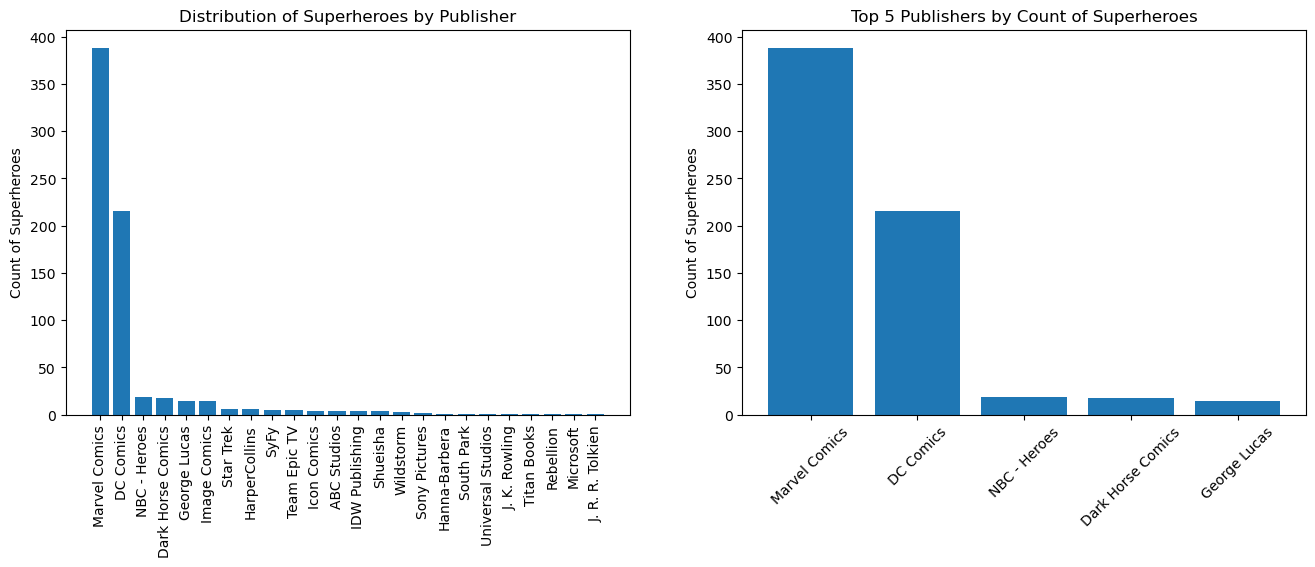

In [20]:
# Run this cell without changes

# Set up plots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 5))

# Create variables for easier reuse
value_counts = heroes_df["Publisher"].value_counts()
top_5_counts = value_counts.iloc[:5]

# Plot data
ax1.bar(value_counts.index, value_counts.values)
ax2.bar(top_5_counts.index, top_5_counts.values)

# Customize appearance
ax1.tick_params(axis="x", labelrotation=90)
ax2.tick_params(axis="x", labelrotation=45)
ax1.set_ylabel("Count of Superheroes")
ax2.set_ylabel("Count of Superheroes")
ax1.set_title("Distribution of Superheroes by Publisher")
ax2.set_title("Top 5 Publishers by Count of Superheroes");

In [21]:
#Display 
plt.show()

## 3. Perform Data Aggregation and Cleaning Required to Answer Second Question

Recall that the second question is: *What is the relationship between height and number of superpowers? And does this differ based on gender?*

Unlike the previous question, we won't be able to answer this with just `heroes_df`, since information about height is contained in `heroes_df`, while information about superpowers is contained in `powers_df`.

### Joining the Dataframes Together

First, identify the shared key between `heroes_df` and `powers_df`. (Shared key meaning, the values you want to join on.) Let's look at them again:

In [22]:
# Run this cell without changes
heroes_df

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
...,...,...,...,...,...,...,...,...,...,...
729,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0
730,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0
731,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0
732,Zatanna,Female,blue,Human,Black,170.0,DC Comics,-,good,57.0


In [23]:
heroes_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
729    False
730    False
731    False
732    False
733    False
Length: 719, dtype: bool

In [24]:
heroes_df.duplicated().any()

True

In [25]:
heroes_df.duplicated().sum()

1

In [26]:
heroes_df.drop_duplicates

<bound method DataFrame.drop_duplicates of                 name  Gender Eye color               Race        Hair color  \
0             A-Bomb    Male    yellow              Human           No Hair   
1         Abe Sapien    Male      blue      Icthyo Sapien           No Hair   
2           Abin Sur    Male      blue            Ungaran           No Hair   
3        Abomination    Male     green  Human / Radiation           No Hair   
4            Abraxas    Male      blue      Cosmic Entity             Black   
..               ...     ...       ...                ...               ...   
729  Yellowjacket II  Female      blue              Human  Strawberry Blond   
730             Ymir    Male     white        Frost Giant           No Hair   
731             Yoda    Male     brown     Yoda's species             White   
732          Zatanna  Female      blue              Human             Black   
733             Zoom    Male       red                  -             Brown   

     Hei

In [27]:
heroes_df.duplicated().any()

True

In [28]:
heroes_df.duplicated().sum()

1

In [29]:
heroes_df.drop_duplicates(inplace=True)

In [30]:
heroes_df


,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
...,...,...,...,...,...,...,...,...,...,...
729,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0
730,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0
731,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0
732,Zatanna,Female,blue,Human,Black,170.0,DC Comics,-,good,57.0


In [31]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 718 entries, 0 to 733
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        718 non-null    object 
 1   Gender      718 non-null    object 
 2   Eye color   718 non-null    object 
 3   Race        718 non-null    object 
 4   Hair color  718 non-null    object 
 5   Height      718 non-null    float64
 6   Publisher   718 non-null    object 
 7   Skin color  718 non-null    object 
 8   Alignment   718 non-null    object 
 9   Weight      718 non-null    float64
dtypes: float64(2), object(8)
memory usage: 61.7+ KB


In [32]:
heroes_df.isnull().any()

name          False
Gender        False
Eye color     False
Race          False
Hair color    False
Height        False
Publisher     False
Skin color    False
Alignment     False
Weight        False
dtype: bool

In [33]:
heroes_df.isnull().sum()

name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Skin color    0
Alignment     0
Weight        0
dtype: int64

In [34]:
# Run this cell without changes
powers_df

,3-D Man,A-Bomb,Abe Sapien,Abin Sur,Abomination,Abraxas,Absorbing Man,Adam Monroe,Adam Strange,Agent Bob,...,Wonder Man,Wonder Woman,X-23,X-Man,Yellowjacket,Yellowjacket II,Ymir,Yoda,Zatanna,Zoom
Agility,True,False,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
Accelerated Healing,False,True,True,False,True,False,False,True,False,False,...,False,True,True,False,False,False,False,False,False,False
Lantern Power Ring,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Dimensional Awareness,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Cold Resistance,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Phoenix Force,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Molecular Dissipation,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Vision - Cryo,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Omnipresent,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [35]:
powers_df.duplicated()

Agility                  False
Accelerated Healing      False
Lantern Power Ring       False
Dimensional Awareness    False
Cold Resistance          False
                         ...  
Phoenix Force            False
Molecular Dissipation    False
Vision - Cryo            False
Omnipresent              False
Omniscient                True
Length: 167, dtype: bool

In [36]:
powers_df.duplicated().any()

True

In [37]:
powers_df.duplicated().sum()

2

In [38]:
powers_df.drop_duplicates()

,3-D Man,A-Bomb,Abe Sapien,Abin Sur,Abomination,Abraxas,Absorbing Man,Adam Monroe,Adam Strange,Agent Bob,...,Wonder Man,Wonder Woman,X-23,X-Man,Yellowjacket,Yellowjacket II,Ymir,Yoda,Zatanna,Zoom
Agility,True,False,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
Accelerated Healing,False,True,True,False,True,False,False,True,False,False,...,False,True,True,False,False,False,False,False,False,False
Lantern Power Ring,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Dimensional Awareness,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Cold Resistance,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Speed Force,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Phoenix Force,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Molecular Dissipation,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Vision - Cryo,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [39]:
powers_df.isnull().any()

3-D Man            False
A-Bomb             False
Abe Sapien         False
Abin Sur           False
Abomination        False
                   ...  
Yellowjacket II    False
Ymir               False
Yoda               False
Zatanna            False
Zoom               False
Length: 667, dtype: bool

In [40]:
powers_df.isnull().sum()

3-D Man            0
A-Bomb             0
Abe Sapien         0
Abin Sur           0
Abomination        0
                  ..
Yellowjacket II    0
Ymir               0
Yoda               0
Zatanna            0
Zoom               0
Length: 667, dtype: int64

In the cell below, identify the shared key, and your strategy for joining the data (e.g. what will one record represent after you join, will you do a left/right/inner/outer join):

In [41]:
# Replace None with appropriate text
"""
Shared key: The superhero's name
I will do the left join since i want to keep supeheroes that are present in both datasets 
"""

"\nShared key: The superhero's name\nI will do the left join since i want to keep supeheroes that are present in both datasets \n"

In the cell below, create a new dataframe called `heroes_and_powers_df` that contains the joined data. You can look at the above answer in the solution branch if you're not sure where to start.

***Hint:*** Note that the `.join` method requires that the two dataframes share an index ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html)) whereas the `.merge` method can join using any columns ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html)). It is up to you which one you want to use.

Run the code below to check your work:

In [42]:
# Step 1: Reshape the powers_df by transposing it
powers_reshaped = powers_df.T  # Transpose so heroes become rows
powers_reshaped = powers_reshaped.reset_index()  # Reset index to get the hero names in a column
powers_reshaped.columns = ['name'] + list(powers_reshaped.columns[1:])  # Assign proper column names

# Step 2: Merge heroes_df and the reshaped powers_df on 'name'
heroes_and_powers_df = pd.merge(heroes_df, powers_reshaped, on='name', how='left')

# Step 3: Add a column for the number of superpowers
# The number of superpowers is simply the count of True values (assuming True represents that the hero has that power)
heroes_and_powers_df['num_superpowers'] = heroes_and_powers_df.iloc[:, 10:].sum(axis=1)  # Count the number of 'True' values

# Step 4: Perform data aggregation
# Group by gender and calculate the average height and number of superpowers for each gender
gender_analysis = heroes_and_powers_df.groupby('Gender').agg(
    avg_height=('Height', 'mean'),
    avg_num_superpowers=('num_superpowers', 'mean')
).reset_index()



In [43]:
print(f"heroes_df rows: {heroes_df.shape[0]}")
print(f"powers_df rows: {powers_df.shape[0]}")

heroes_df rows: 718
powers_df rows: 167


In [44]:
# Check if all names from heroes_df exist in powers_reshaped
missing_heroes = set(heroes_df['name']) - set(powers_reshaped['name'])
print(f"Missing heroes in powers_df: {missing_heroes}")

# Check if all names from powers_df exist in heroes_df
missing_heroes_in_heroes_df = set(powers_reshaped['name']) - set(heroes_df['name'])
print(f"Missing heroes in heroes_df: {missing_heroes_in_heroes_df}")

Missing heroes in powers_df: {'Jesse Quick', 'Kingpin', 'Yellow Claw', 'Agent 13', 'Giant-Man', 'Mister Zsasz', 'Vulcan', 'Spider-Carnage', 'Nite Owl II', 'Vision II', 'Wiz Kid', 'Cecilia Reyes', 'Colossal Boy', 'Black Widow II', 'Renata Soliz', 'Beetle', 'Box', 'Goliath', 'Omega Red', 'Corsair', 'Jigsaw', 'Power Man', 'Cypher', 'Franklin Storm', 'Box III', 'Vagabond', 'Penance I', 'Kid Flash II', 'Clea', 'Ronin', 'Captain Mar-vell', 'Danny Cooper', 'Bolt', 'Morph', 'Hawkwoman III', 'Meteorite', 'Wondra', 'Stacy X', 'Black Goliath', 'Hawkwoman II', 'ERG-1', 'Penance', 'White Queen', 'Cat II', 'Hawkwoman', 'Shrinking Violet', 'Colin Wagner', 'Blaquesmith', 'Thunderbird II', 'Warbird', 'Two-Face', 'Moloch', 'Boomer', 'Mogo', 'Jessica Sanders', 'Guardian', 'Paul Blart', 'Howard the Duck', 'Fixer', 'Jyn Erso', 'Arsenal', 'Spider-Woman II', 'Clock King', 'Batgirl III', 'Giant-Man II', 'Plastic Lad', 'Wyatt Wingfoot', 'Alfred Pennyworth', 'Batgirl V', 'Snake-Eyes'}
Missing heroes in heroes_d

In [45]:
# Check rows in heroes_df and powers_df
print(f"heroes_df rows: {heroes_df.shape[0]}")
print(f"powers_df rows: {powers_df.shape[0]}")

# Check for missing or mismatched hero names
missing_heroes = set(heroes_df['name']) - set(powers_reshaped['name'])
print(f"Missing heroes in powers_df: {missing_heroes}")

missing_heroes_in_heroes_df = set(powers_reshaped['name']) - set(heroes_df['name'])
print(f"Missing heroes in heroes_df: {missing_heroes_in_heroes_df}")

# Perform the merge and print the resulting shape
heroes_and_powers_df = pd.merge(heroes_df, powers_reshaped, on='name', how='left')
print(f"After merging, heroes_and_powers_df shape: {heroes_and_powers_df.shape}")

# Perform further analysis if necessary
heroes_and_powers_df['num_superpowers'] = heroes_and_powers_df.iloc[:, 10:].sum(axis=1)  # Adjust if needed

heroes_df rows: 718
powers_df rows: 167
Missing heroes in powers_df: {'Jesse Quick', 'Kingpin', 'Yellow Claw', 'Agent 13', 'Giant-Man', 'Mister Zsasz', 'Vulcan', 'Spider-Carnage', 'Nite Owl II', 'Vision II', 'Wiz Kid', 'Cecilia Reyes', 'Colossal Boy', 'Black Widow II', 'Renata Soliz', 'Beetle', 'Box', 'Goliath', 'Omega Red', 'Corsair', 'Jigsaw', 'Power Man', 'Cypher', 'Franklin Storm', 'Box III', 'Vagabond', 'Penance I', 'Kid Flash II', 'Clea', 'Ronin', 'Captain Mar-vell', 'Danny Cooper', 'Bolt', 'Morph', 'Hawkwoman III', 'Meteorite', 'Wondra', 'Stacy X', 'Black Goliath', 'Hawkwoman II', 'ERG-1', 'Penance', 'White Queen', 'Cat II', 'Hawkwoman', 'Shrinking Violet', 'Colin Wagner', 'Blaquesmith', 'Thunderbird II', 'Warbird', 'Two-Face', 'Moloch', 'Boomer', 'Mogo', 'Jessica Sanders', 'Guardian', 'Paul Blart', 'Howard the Duck', 'Fixer', 'Jyn Erso', 'Arsenal', 'Spider-Woman II', 'Clock King', 'Batgirl III', 'Giant-Man II', 'Plastic Lad', 'Wyatt Wingfoot', 'Alfred Pennyworth', 'Batgirl V', 

In [46]:
# Check how many heroes have no superpowers (num_superpowers = 0)
heroes_without_superpowers = heroes_and_powers_df[heroes_and_powers_df['num_superpowers'] == 0]
print(f"Number of heroes with no superpowers: {heroes_without_superpowers.shape[0]}")
# Step 2: Filter out heroes with no superpowers
heroes_and_powers_df = heroes_and_powers_df[heroes_and_powers_df['num_superpowers'] > 0]

# Step 3: Confirm that after filtering, the DataFrame has 647 rows
print(f"Shape after filtering: {heroes_and_powers_df.shape}")



Number of heroes with no superpowers: 71
Shape after filtering: (647, 178)


In [47]:
heroes_and_powers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 647 entries, 0 to 717
Columns: 178 entries, name to num_superpowers
dtypes: float64(3), object(175)
memory usage: 904.8+ KB


In [48]:
heroes_and_powers_df.shape

(647, 178)

In [49]:
print(heroes_and_powers_df.head())

          name Gender Eye color               Race Hair color  Height  \
0       A-Bomb   Male    yellow              Human    No Hair   203.0   
1   Abe Sapien   Male      blue      Icthyo Sapien    No Hair   191.0   
2     Abin Sur   Male      blue            Ungaran    No Hair   185.0   
3  Abomination   Male     green  Human / Radiation    No Hair   203.0   
4      Abraxas   Male      blue      Cosmic Entity      Black   -99.0   

           Publisher Skin color Alignment  Weight  ... Reality Warping  \
0      Marvel Comics          -      good   441.0  ...           False   
1  Dark Horse Comics       blue      good    65.0  ...           False   
2          DC Comics        red      good    90.0  ...           False   
3      Marvel Comics          -       bad   441.0  ...           False   
4      Marvel Comics          -       bad   -99.0  ...           False   

  Odin Force Symbiote Costume Speed Force Phoenix Force Molecular Dissipation  \
0      False            False      

In [50]:
print(heroes_and_powers_df.shape)

(647, 178)


In [51]:
heroes_and_powers_df

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,num_superpowers
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,...,False,False,False,False,False,False,False,False,False,7.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,...,False,False,False,False,False,False,False,False,False,16.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,...,False,False,False,False,False,False,False,False,False,1.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,...,False,False,False,False,False,False,False,False,False,8.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,...,False,False,False,False,False,False,False,False,False,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0,...,False,False,False,False,False,False,False,False,False,3.0
714,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0,...,False,False,False,False,False,False,False,False,False,6.0
715,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0,...,False,False,False,False,False,False,False,False,False,19.0
716,Zatanna,Female,blue,Human,Black,170.0,DC Comics,-,good,57.0,...,False,False,False,False,False,False,False,False,False,8.0


In [52]:
# Run this cell without changes

# Confirms you have created a DataFrame with the specified name
assert type(heroes_and_powers_df) == pd.DataFrame

# Confirms you have the right number of rows
assert heroes_and_powers_df.shape[0] == 647

# Confirms you have the necessary columns
# (If you modified the value of powers_df along the way, you might need to
# modify this test. We are checking that all of the powers are present as
# columns.)
assert [power in heroes_and_powers_df.columns for power in powers_df.index]
# (If you modified the value of heroes_df along the way, you might need to
# modify this as well. We are checking that all of the attribute columns from
# heroes_df are present as columns in the joined df)
assert [attribute in heroes_and_powers_df.columns for attribute in heroes_df.columns]

Now that we have created a joined dataframe, we can aggregate the number of superpowers by superhero. This code is written for you:

In [53]:
# Run this cell without changes

# Note: we can use sum() with True and False values and they will
# automatically be cast to 1s and 0s
heroes_and_powers_df["Power Count"] = sum(
    [heroes_and_powers_df[power_name] for power_name in powers_df.index]
)
heroes_and_powers_df

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,num_superpowers,Power Count
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,...,False,False,False,False,False,False,False,False,7.0,7
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,...,False,False,False,False,False,False,False,False,16.0,16
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,...,False,False,False,False,False,False,False,False,1.0,1
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,...,False,False,False,False,False,False,False,False,8.0,8
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,...,False,False,False,False,False,False,False,False,14.0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0,...,False,False,False,False,False,False,False,False,3.0,3
714,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0,...,False,False,False,False,False,False,False,False,6.0,6
715,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0,...,False,False,False,False,False,False,False,False,19.0,19
716,Zatanna,Female,blue,Human,Black,170.0,DC Comics,-,good,57.0,...,False,False,False,False,False,False,False,False,8.0,8


In [54]:
# Check the columns of heroes_and_powers_df
print(heroes_and_powers_df.columns)

Index(['name', 'Gender', 'Eye color', 'Race', 'Hair color', 'Height',
       'Publisher', 'Skin color', 'Alignment', 'Weight',
       ...
       'Odin Force', 'Symbiote Costume', 'Speed Force', 'Phoenix Force',
       'Molecular Dissipation', 'Vision - Cryo', 'Omnipresent', 'Omniscient',
       'num_superpowers', 'Power Count'],
      dtype='object', length=179)


In [55]:
# Check powers in powers_df
print(powers_df.index)

Index(['Agility', 'Accelerated Healing', 'Lantern Power Ring',
       'Dimensional Awareness', 'Cold Resistance', 'Durability', 'Stealth',
       'Energy Absorption', 'Flight', 'Danger Sense',
       ...
       'Web Creation', 'Reality Warping', 'Odin Force', 'Symbiote Costume',
       'Speed Force', 'Phoenix Force', 'Molecular Dissipation',
       'Vision - Cryo', 'Omnipresent', 'Omniscient'],
      dtype='object', length=167)


In [56]:
# Run this cell without changes

# Note: we can use sum() with True and False values and they will
# automatically be cast to 1s and 0s
heroes_and_powers_df["Power Count"] = sum(
    [heroes_and_powers_df[power_name] for power_name in powers_df.index]
)
heroes_and_powers_df

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,num_superpowers,Power Count
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,...,False,False,False,False,False,False,False,False,7.0,7
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,...,False,False,False,False,False,False,False,False,16.0,16
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,...,False,False,False,False,False,False,False,False,1.0,1
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,...,False,False,False,False,False,False,False,False,8.0,8
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,...,False,False,False,False,False,False,False,False,14.0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0,...,False,False,False,False,False,False,False,False,3.0,3
714,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0,...,False,False,False,False,False,False,False,False,6.0,6
715,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0,...,False,False,False,False,False,False,False,False,19.0,19
716,Zatanna,Female,blue,Human,Black,170.0,DC Comics,-,good,57.0,...,False,False,False,False,False,False,False,False,8.0,8


### Answering the Question

Now we can plot the height vs. the count of powers:

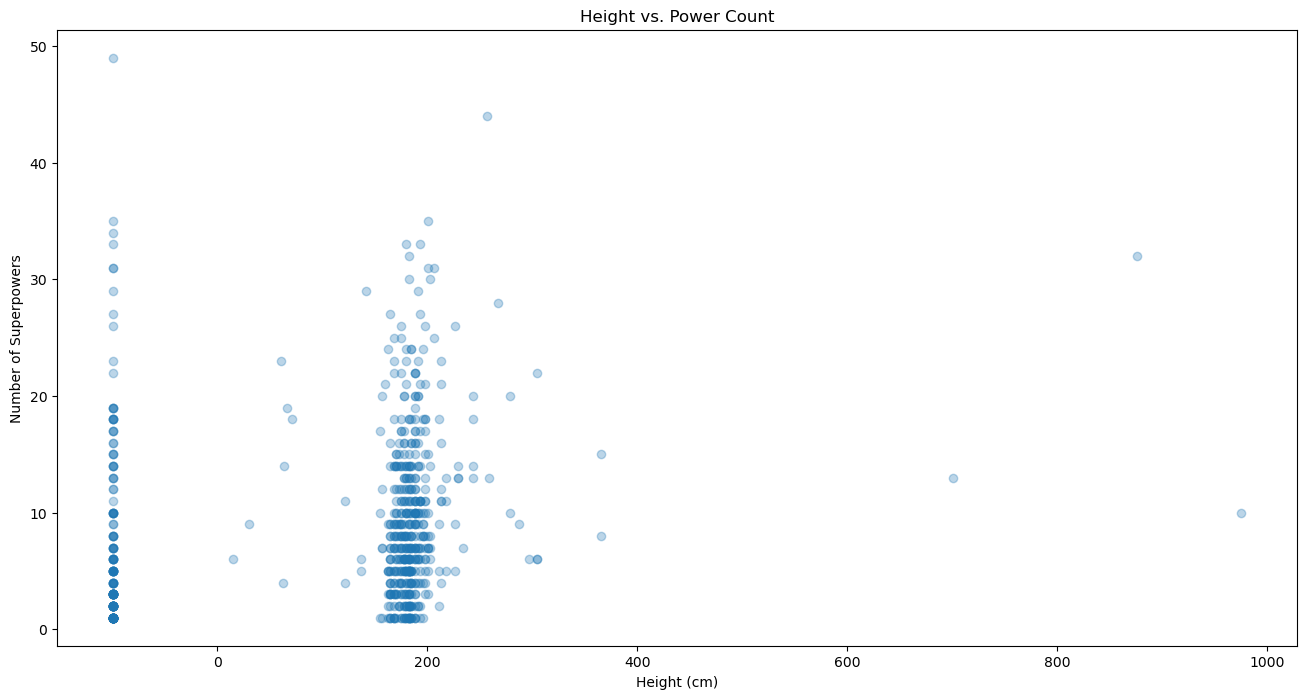

In [57]:
# Run this cell without changes

fig, ax = plt.subplots(figsize=(16, 8))

ax.scatter(
    x=heroes_and_powers_df["Height"], y=heroes_and_powers_df["Power Count"], alpha=0.3
)

ax.set_xlabel("Height (cm)")
ax.set_ylabel("Number of Superpowers")
ax.set_title("Height vs. Power Count");

In [58]:
#Display
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

Hmm...what is that stack of values off below zero? What is a "negative" height?

### Identifying and Handling Invalid values

One of the trickier tasks in data cleaning is identifying invalid or impossible values. In these cases, you have to apply your domain knowledge rather than any particular computational technique. For example, if you were looking at data containing dates of past home sales, and one of those dates was 100 years in the future, pandas wouldn't flag that as an issue, but you as a data scientist should be able to identify it.

In this case, we are looking at heights, which are 1-dimensional, positive numbers. In theory we could have a very tiny height close to 0 cm because the hero is microscopic, but it does not make sense that we would have a height below zero.

Let's take a look at a sample of those negative heights:

In [59]:
# Run this cell without changes
heroes_and_powers_df[heroes_and_powers_df["Height"] < 0].sample(5, random_state=1)

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,num_superpowers,Power Count
166,Chameleon,Male,-,-,-,-99.0,DC Comics,-,bad,-99.0,...,False,False,False,False,False,False,False,False,1.0,1
184,Crimson Crusader,Male,blue,-,Strawberry Blond,-99.0,Marvel Comics,-,good,-99.0,...,False,False,False,False,False,False,False,False,4.0,4
405,Luna,Female,-,Human,-,-99.0,Marvel Comics,-,good,-99.0,...,False,False,False,False,False,False,False,False,1.0,1
353,JJ Powell,Male,-,-,-,-99.0,ABC Studios,-,good,-99.0,...,False,False,False,False,False,False,False,False,1.0,1
696,Weapon XI,Male,-,-,-,-99.0,Marvel Comics,-,bad,-99.0,...,False,False,False,False,False,False,False,False,7.0,7


It looks like not only are those heights negative, those weights are negative also, and all of them are set to exactly -99.0.

It seems like this data source probably filled in -99.0 as the height or weight whenever it was unknown, instead of just leaving it as NaN.

Depending on the purpose of the analysis, maybe this would be a useful piece of information, but for our current question, let's go ahead and drop the records where the height is -99.0. We'll make a new temporary dataframe to make sure we don't accidentally delete anything that will be needed in a future question.

In [60]:
# Run this cell without changes
question_2_df = heroes_and_powers_df[heroes_and_powers_df["Height"] != -99.0].copy()
question_2_df

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,num_superpowers,Power Count
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,...,False,False,False,False,False,False,False,False,7.0,7
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,...,False,False,False,False,False,False,False,False,16.0,16
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,...,False,False,False,False,False,False,False,False,1.0,1
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,...,False,False,False,False,False,False,False,False,8.0,8
5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0,...,False,False,False,False,False,False,False,False,11.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0,...,False,False,False,False,False,False,False,False,3.0,3
714,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0,...,False,False,False,False,False,False,False,False,6.0,6
715,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0,...,False,False,False,False,False,False,False,False,19.0,19
716,Zatanna,Female,blue,Human,Black,170.0,DC Comics,-,good,57.0,...,False,False,False,False,False,False,False,False,8.0,8


### Answering the Question, Again

Now we can redo that plot without those negative heights:

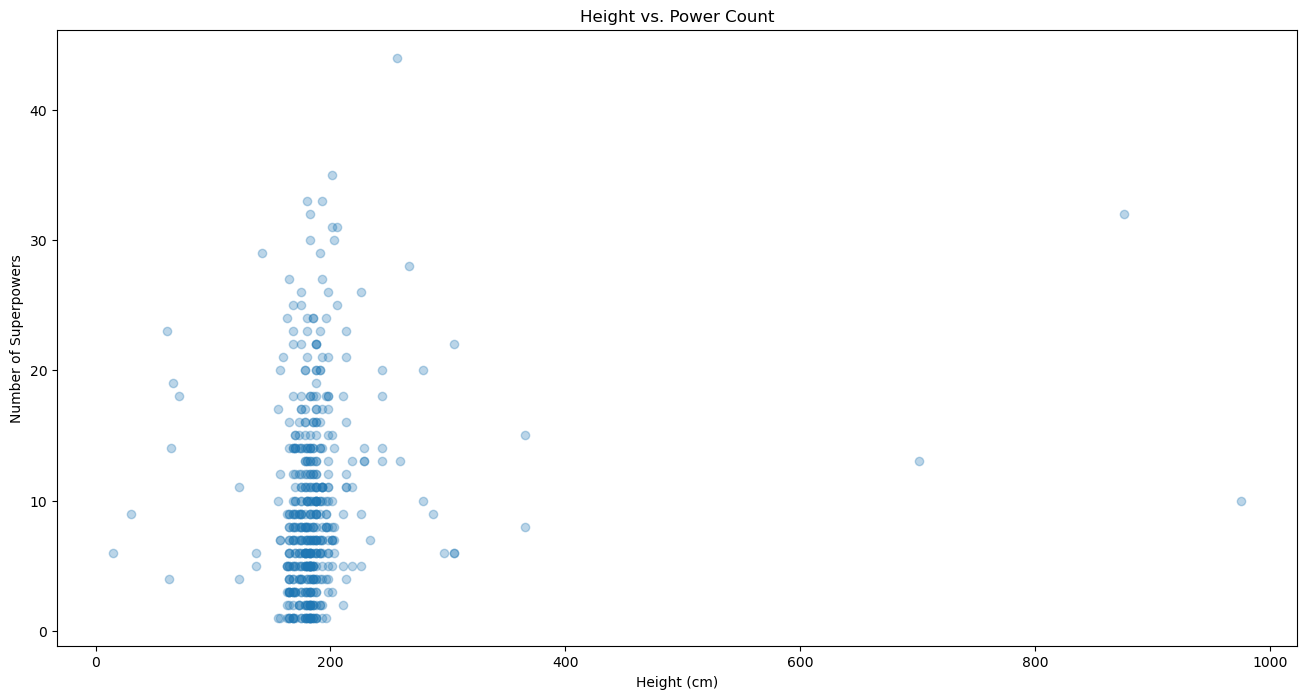

In [61]:
# Run this cell without changes

fig, ax = plt.subplots(figsize=(16, 8))

ax.scatter(x=question_2_df["Height"], y=question_2_df["Power Count"], alpha=0.3)

ax.set_xlabel("Height (cm)")
ax.set_ylabel("Number of Superpowers")
ax.set_title("Height vs. Power Count");

In [62]:
#Display
plt.show()

Ok, that makes more sense. It looks like there is not much of a relationship between height and number of superpowers.

Now we can go on to answering the second half of question 2: *And does this differ based on gender?*

To indicate multiple categories within a scatter plot, we can use color to add a third dimension:

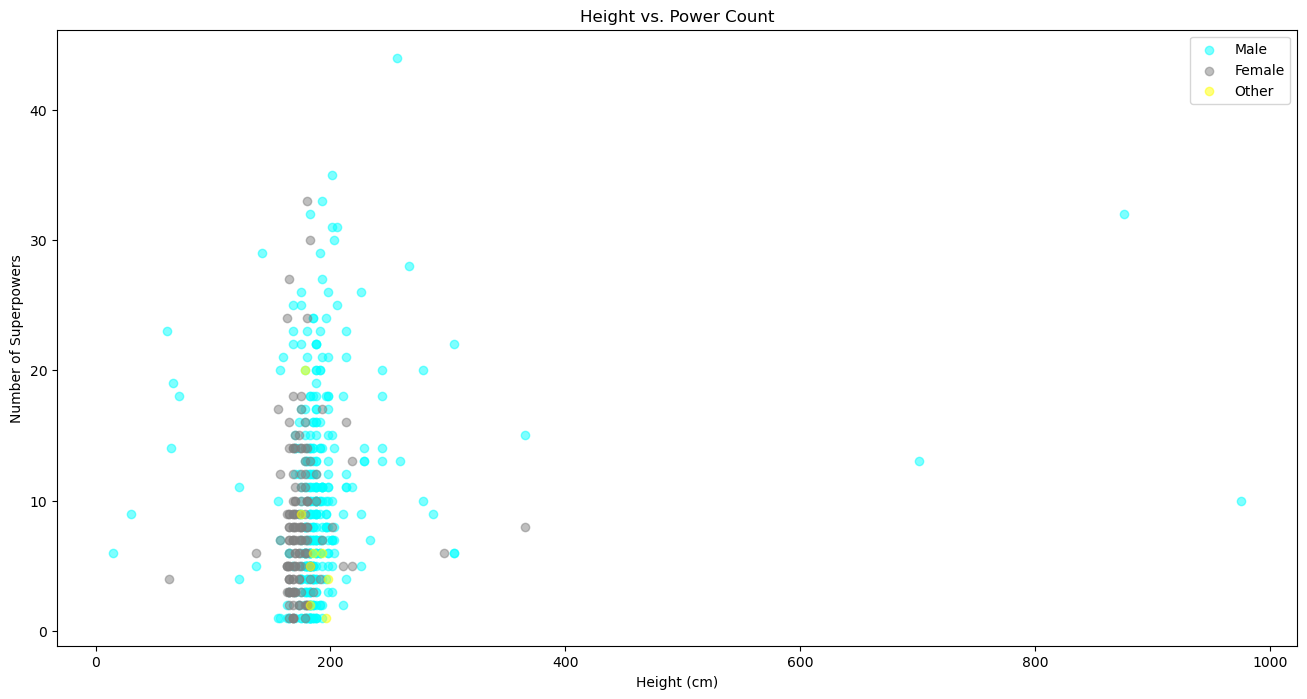

In [63]:
# Run this cell without changes

fig, ax = plt.subplots(figsize=(16, 8))

# Select subsets
question_2_male = question_2_df[question_2_df["Gender"] == "Male"]
question_2_female = question_2_df[question_2_df["Gender"] == "Female"]
question_2_other = question_2_df[
    (question_2_df["Gender"] != "Male") & (question_2_df["Gender"] != "Female")
]

# Plot data with different colors
ax.scatter(
    x=question_2_male["Height"],
    y=question_2_male["Power Count"],
    alpha=0.5,
    color="cyan",
    label="Male",
)
ax.scatter(
    x=question_2_female["Height"],
    y=question_2_female["Power Count"],
    alpha=0.5,
    color="gray",
    label="Female",
)
ax.scatter(
    x=question_2_other["Height"],
    y=question_2_other["Power Count"],
    alpha=0.5,
    color="yellow",
    label="Other",
)

# Customize appearance
ax.set_xlabel("Height (cm)")
ax.set_ylabel("Number of Superpowers")
ax.set_title("Height vs. Power Count")
ax.legend();

In [64]:
#Display
plt.show()

It appears that there is still no clear relationship between count of powers and height, regardless of gender. We do however note that "Male" is the most common gender, and that male superheroes tend to be taller, on average.

## 4. Perform Data Aggregation Required to Answer Third Question

Recall that the third question is: *What are the 5 most common superpowers in Marvel Comics vs. DC Comics?*

We'll need to keep using `heroes_and_powers_df` since we require information from both `heroes_df` and `powers_df`.

Your resulting `question_3_df` should contain aggregated data, with columns `Superpower Name`, `Marvel Comics` (containing the count of occurrences in Marvel Comics), and `DC Comics` (containing the count of occurrences in DC Comics). Each row should represent a superpower.

In other words, `question_3_df` should look like this:

![question 3 df](images/question_3.png)

Don't worry if the rows or columns are in a different order, all that matters is that you have the right rows and columns with all the data.

***Hint:*** refer to the [documentation for `.groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) and treat each publisher as a group.

The code below checks that you have the correct dataframe structure:

In [65]:
# Step 1: Identify superpower columns (exclude other columns like name, gender, etc.)
superpower_columns = [col for col in heroes_and_powers_df.columns if col not in ['name', 'Gender', 'Eye color', 'Race', 'Hair color', 'Height', 'Publisher', 'Skin color', 'Alignment', 'Weight', 'num_superpowers']]

# Step 2: Create a new dataframe where each superpower column is '1' if the hero has the power, '0' otherwise
powers_df = heroes_and_powers_df[superpower_columns]

# Step 3: Create a copy of powers_df and add the 'Publisher' column to it
powers_df = heroes_and_powers_df[superpower_columns].copy()
powers_df['Publisher'] = heroes_and_powers_df['Publisher']

# Step 4: Sum the superpowers by Publisher
aggregated_data = powers_df.groupby('Publisher').sum()

# Step 5: Transpose the data so that superpowers become rows and publishers are columns
aggregated_data = aggregated_data.T

# Step 6: Sort the superpowers by their count (in descending order) and take the top 5
aggregated_data = aggregated_data.sort_values(by=['Marvel Comics', 'DC Comics'], ascending=False)

# Step 7: Reset the index to have 'Superpower Name' as a column and make the table easier to read
aggregated_data = aggregated_data.reset_index()

# Step 8: Rename columns to match the required format
aggregated_data = aggregated_data.rename(columns={'index': 'Superpower Name'})

# Step 9: Ensure the dataframe matches the expected format
question_3_df = aggregated_data[['Superpower Name', 'Marvel Comics', 'DC Comics']]

# Checking the shape and columns
print("Actual shape:", question_3_df.shape)
print(question_3_df.head())



Actual shape: (168, 3)
Publisher Superpower Name Marvel Comics DC Comics
0             Power Count          3068      1936
1          Super Strength           204       109
2              Durability           154        71
3                 Stamina           150        90
4             Super Speed           137        79


In [66]:
# Check for rows with missing or invalid 'Superpower Name'
invalid_rows = question_3_df[question_3_df['Superpower Name'].isnull()]
print("Invalid rows (if any):")
print(invalid_rows)

Invalid rows (if any):
Empty DataFrame
Columns: [Superpower Name, Marvel Comics, DC Comics]
Index: []


In [67]:
# Check for duplicate rows
duplicate_rows = question_3_df[question_3_df.duplicated(subset=['Superpower Name'])]
print("Duplicate rows (if any):")
print(duplicate_rows)

Duplicate rows (if any):
Empty DataFrame
Columns: [Superpower Name, Marvel Comics, DC Comics]
Index: []


In [68]:
# If invalid rows are found, you can remove them
question_3_df = question_3_df.dropna(subset=['Superpower Name'])

# Remove duplicates
question_3_df = question_3_df.drop_duplicates(subset=['Superpower Name'])

# Check the updated shape
print("Updated shape after filtering:")
print(question_3_df.shape)

Updated shape after filtering:
(168, 3)


In [69]:
# Check for duplicate index values
duplicate_indexes = question_3_df.index[question_3_df.index.duplicated()]
print("Duplicate indexes (if any):")
print(duplicate_indexes)

Duplicate indexes (if any):
Int64Index([], dtype='int64')


In [70]:
# Check for duplicate column names
duplicate_columns = question_3_df.columns[question_3_df.columns.duplicated()]
print("Duplicate columns (if any):")
print(duplicate_columns)

Duplicate columns (if any):
Index([], dtype='object', name='Publisher')


In [71]:
# Reset the index if there are duplicate indexes
question_3_df = question_3_df.reset_index(drop=True)

In [72]:
# Fix duplicate columns by renaming them or removing them
question_3_df = question_3_df.loc[:, ~question_3_df.columns.duplicated()]

In [73]:
# Check the updated shape and content
print("Updated shape after fixing duplicates:")
print(question_3_df.shape)
print(question_3_df.head())

Updated shape after fixing duplicates:
(168, 3)
Publisher Superpower Name Marvel Comics DC Comics
0             Power Count          3068      1936
1          Super Strength           204       109
2              Durability           154        71
3                 Stamina           150        90
4             Super Speed           137        79


In [74]:
# Step 1: Remove the "Power Count" row
question_3_df = question_3_df[question_3_df['Superpower Name'] != 'Power Count']

# Step 2: Check the updated shape
print("Updated shape after removing 'Power Count':")
print(question_3_df.shape)



Updated shape after removing 'Power Count':
(167, 3)


In [75]:
# Run this cell without changes

# Checking that you made a dataframe called question_3_df
assert type(question_3_df) == pd.DataFrame

# Checking the shape
assert question_3_df.shape == (167, 3)

# Checking the column names
assert sorted(list(question_3_df.columns)) == [
    "DC Comics",
    "Marvel Comics",
    "Superpower Name",
]

### Answering the Question

The code below uses the dataframe you created to find and plot the most common superpowers in Marvel Comics and DC Comics.

In [76]:
# Run this cell without changes

marvel_most_common = question_3_df.drop("DC Comics", axis=1)
marvel_most_common = marvel_most_common.sort_values(
    by="Marvel Comics", ascending=False
)[:5]
marvel_most_common

Publisher,Superpower Name,Marvel Comics
1,Super Strength,204
2,Durability,154
3,Stamina,150
4,Super Speed,137
5,Agility,126


In [77]:
# Run this cell without changes

dc_most_common = question_3_df.drop("Marvel Comics", axis=1)
dc_most_common = dc_most_common.sort_values(by="DC Comics", ascending=False)[:5]
dc_most_common

Publisher,Superpower Name,DC Comics
1,Super Strength,109
3,Stamina,90
6,Flight,86
4,Super Speed,79
2,Durability,71


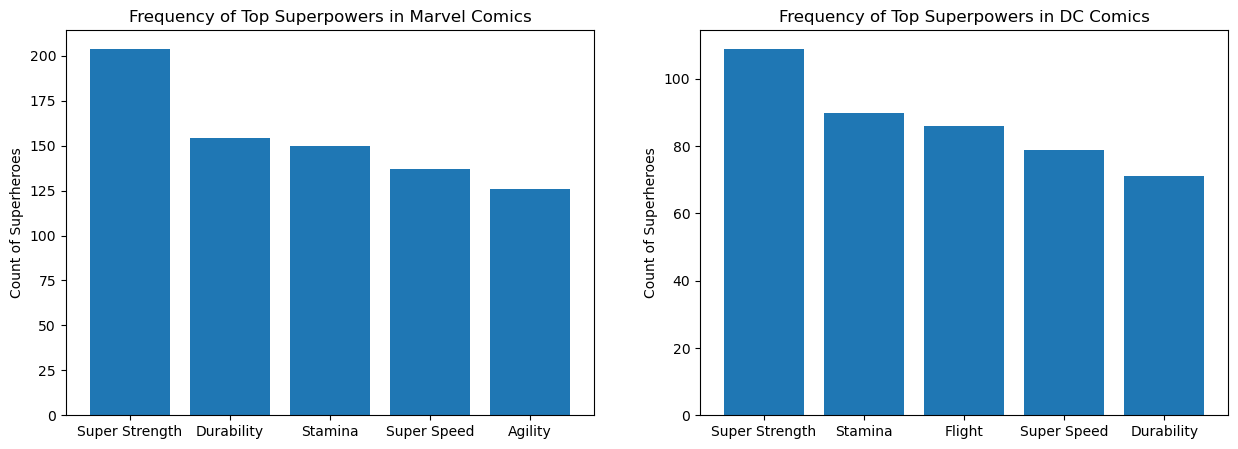

In [78]:
# Run this cell without changes

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))

ax1.bar(
    x=marvel_most_common["Superpower Name"], height=marvel_most_common["Marvel Comics"]
)
ax2.bar(x=dc_most_common["Superpower Name"], height=dc_most_common["DC Comics"])

ax1.set_ylabel("Count of Superheroes")
ax2.set_ylabel("Count of Superheroes")
ax1.set_title("Frequency of Top Superpowers in Marvel Comics")
ax2.set_title("Frequency of Top Superpowers in DC Comics");

In [79]:
#Display
plt.show()

It looks like super strength is the most popular power in both Marvel Comics and DC Comics. Overall, the top 5 powers are fairly similar — 4 out of 5 overlap, although Marvel contains agility whereas DC contains flight.

## 5. Formulate and Answer Your Own Question

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight)?
* What is the distribution of skin colors amongst alien heroes?
* How are eye color and hair color related in this dataset?

Explain your question below:

## 1.Question:
What is the distribution of superpowers across different hero alignments (e.g., good, bad, or neutral)?

In [80]:
# Replace None with appropriate text:
"""
Analyzing the relationship between hero alignments (a categorical variable) and the number of superpowers they possess (a numerical variable). It will give us insights into whether certain alignments are more likely to have a higher or lower number of superpowers. The question involves both descriptive statistics (such as mean and distribution of superpowers for each alignment) and data visualization (like histograms or box plots) to compare the distribution of superpowers across different alignments.

 "good" heroes tend to have more powers, or if "bad" or "neutral" heroes have more specialized powers. Additionally, this could help us understand how the diversity of superpowers varies across these alignments.
"""

'\nAnalyzing the relationship between hero alignments (a categorical variable) and the number of superpowers they possess (a numerical variable). It will give us insights into whether certain alignments are more likely to have a higher or lower number of superpowers. The question involves both descriptive statistics (such as mean and distribution of superpowers for each alignment) and data visualization (like histograms or box plots) to compare the distribution of superpowers across different alignments.\n\n "good" heroes tend to have more powers, or if "bad" or "neutral" heroes have more specialized powers. Additionally, this could help us understand how the diversity of superpowers varies across these alignments.\n'

Some sample cells have been provided to give you room to work. Feel free to create more cells as needed.

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

(There is no solution branch for this part, and feel free to move on to the next lesson if you have already spent more than 90 minutes.)

In [81]:
# 1.Prepare the Data
# Assuming heroes_and_powers_df is the combined dataframe of heroes_df and powers_df

# Group by 'Alignment' and calculate descriptive statistics (mean, median, etc.)
alignment_stats = heroes_and_powers_df.groupby('Alignment')['num_superpowers'].describe()

# Check the result
alignment_stats

,count,mean,std,min,25%,50%,75%,max
Alignment,,,,,,,,
-,6.0,15.666667,12.628011,1.0,6.50,14.5,23.25,34.0
bad,193.0,9.279793,7.645427,1.0,3.00,7.0,14.00,44.0
good,424.0,8.674528,7.055854,1.0,3.00,7.0,12.00,49.0
neutral,24.0,13.333333,9.328156,1.0,6.75,11.0,16.25,35.0


In [82]:
#2. Descriptive Statistics for Each Alignment
# Calculate mean and other statistics for each alignment
alignment_mean = heroes_and_powers_df.groupby('Alignment')['num_superpowers'].mean()
alignment_median = heroes_and_powers_df.groupby('Alignment')['num_superpowers'].median()
alignment_std = heroes_and_powers_df.groupby('Alignment')['num_superpowers'].std()

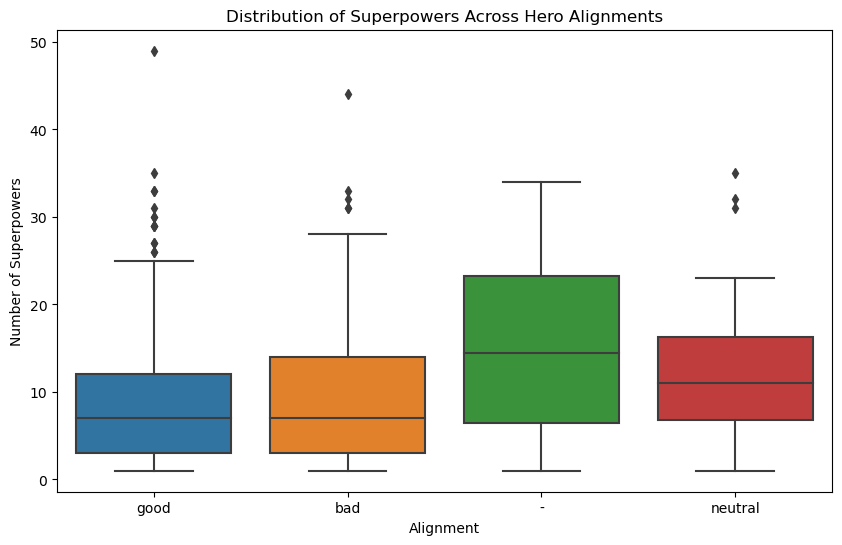

In [83]:
#3. Visualization: Distribution of Superpowers Across Alignments
# Set the plot size for better readability
plt.figure(figsize=(10, 6))

# Create a boxplot to show the distribution of 'num_superpowers' by 'Alignment'
sns.boxplot(x='Alignment', y='num_superpowers', data=heroes_and_powers_df)

# Set title and labels for clarity
plt.title('Distribution of Superpowers Across Hero Alignments')
plt.xlabel('Alignment')
plt.ylabel('Number of Superpowers')

# Display the plot
plt.show()

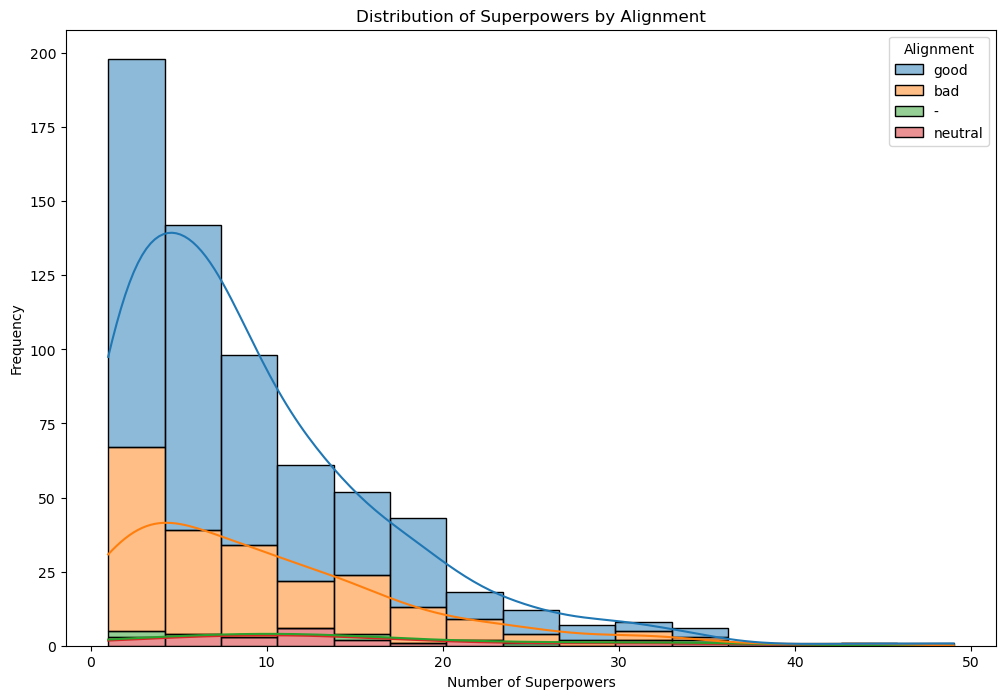

In [84]:
#4. Visualization: Histogram of Superpowers by Alignment
# Set up a grid of subplots for multiple histograms
plt.figure(figsize=(12, 8))

# Plot histograms for 'num_superpowers' by 'Alignment'
sns.histplot(data=heroes_and_powers_df, x='num_superpowers', hue='Alignment', kde=True, multiple="stack", bins=15)

# Set title and labels
plt.title('Distribution of Superpowers by Alignment')
plt.xlabel('Number of Superpowers')
plt.ylabel('Frequency')

# Display the plot
plt.show()

In [85]:
#5. Comparative Analysis
#1.Which alignment has the highest average number of superpowers?
'''
From the Box Plot: The "-" alignment shows the highest median number of superpowers.  While the mean might be slightly different due to the influence of outliers, the median provides a robust measure of the "typical" number of superpowers for each alignment.
From the Histogram: We can see that the "-" alignment (red segments) extends furthest into the higher superpower count bins. The "-" alignment appears to have the highest median number of superpowers.  To get the exact mean, we'd need the raw data.
'''

#2.Are there any outliers for certain alignments?
'''
From the Box Plot: All alignments except "bad" have outliers.  "Neutral" and "-" alignments have several high outliers, indicating heroes with a significantly larger number of superpowers than most others in their category.   
From the Histogram: The long tail extending to the right for some alignments (especially "neutral" and "-") suggesting the presence of outliers.  The box plot provides a more precise identification of outliers.
'''

#3.How does the distribution vary for different alignments?
'''
From the Box Plot: There is variation in distributions through the IQR (box size) and the spread to the whiskers.  "Good" and "bad" alignments have relatively narrow boxes, indicating less variability in the number of superpowers. "Neutral" and "-" have wider boxes and longer whiskers, signifying greater variability.   
From the Histogram: The "good" alignment's distribution looks approximately normal and concentrated.  "Bad" is similar but less concentrated.  The low counts for "neutral" and "-" make it hard to assess their distribution shapes, but the histogram confirms that they have some heroes with very high superpower counts.
'''

'\nFrom the Box Plot: There is variation in distributions through the IQR (box size) and the spread to the whiskers.  "Good" and "bad" alignments have relatively narrow boxes, indicating less variability in the number of superpowers. "Neutral" and "-" have wider boxes and longer whiskers, signifying greater variability. \xa0 \nFrom the Histogram: The "good" alignment\'s distribution looks approximately normal and concentrated.  "Bad" is similar but less concentrated.  The low counts for "neutral" and "-" make it hard to assess their distribution shapes, but the histogram confirms that they have some heroes with very high superpower counts.\n'

In [86]:
#Conclusion

# Show the descriptive statistics for better understanding
# Step 1: Group by 'Alignment' and calculate descriptive statistics
alignment_stats = heroes_and_powers_df.groupby('Alignment').describe()

# Step 2: Print the descriptive statistics for Alignment
print("Descriptive Statistics by Alignment:")
print(alignment_stats)

Descriptive Statistics by Alignment:
          Height                                                             \
           count        mean         std   min    25%    50%     75%    max   
Alignment                                                                     
-            6.0  104.666667  158.884444 -99.0  -28.5  185.5  216.50  229.0   
bad        193.0  110.275648  131.216263 -99.0  -99.0  180.0  191.00  366.0   
good       424.0  116.744811  131.669254 -99.0  122.0  175.0  185.00  975.0   
neutral     24.0  139.291667  209.157623 -99.0  -99.0  186.5  194.25  876.0   

          Weight              ...                num_superpowers             \
           count        mean  ...     75%    max           count       mean   
Alignment                     ...                                             
-            6.0   38.333333  ...   86.25  358.0             6.0  15.666667   
bad        193.0   69.678756  ...  110.00  817.0           193.0   9.279793   
good       424

## Summary

In this lab, you demonstrated your mastery of using pandas to clean and aggregate data in order to answer several business questions. This included identifying and handling missing values, text requiring preprocessing, and invalid values. You also performed aggregation and reshaping tasks such as transposing, joining, and grouping data. Great job, there was a lot here!